In [1]:
import pandas as pd

data_source = "dataset/pima-indians-diabetes.csv"

df = pd.read_csv(data_source, delimiter=',')

df

,preg,gluco,bloodpres,st,insulin,bmi,dbf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.isna().sum()

preg         0
gluco        0
bloodpres    0
st           0
insulin      0
bmi          0
dbf          0
age          0
outcome      0
dtype: int64

In [3]:
# import library
from imblearn.over_sampling import SMOTE, RandomOverSampler

from sklearn.preprocessing import OrdinalEncoder

#smote = SMOTE(k_neighbors=2)

smote = RandomOverSampler(sampling_strategy="auto")

x_binary = OrdinalEncoder()

x = x_binary.fit_transform(df)

cols = df.columns

print(cols)

x = pd.DataFrame(x, columns=cols)

print(x)

x_source = x.drop(["outcome"], axis=1)

print(x_source)

y = x['outcome']

print(y)

print(y.shape)

# fit predictor and target variable

x_smote, y_smote = smote.fit_resample(x, y)

print(x_smote)

print(y_smote)


Index(['preg', 'gluco', 'bloodpres', 'st', 'insulin', 'bmi', 'dbf', 'age',
       'outcome'],
      dtype='object')
     preg  gluco  bloodpres    st  insulin    bmi    dbf   age  outcome
0     6.0   86.0       22.0  28.0      0.0  123.0  350.0  29.0      1.0
1     1.0   23.0       19.0  22.0      0.0   62.0  196.0  10.0      0.0
2     8.0  121.0       17.0   0.0      0.0   30.0  368.0  11.0      1.0
3     1.0   27.0       19.0  16.0     62.0   77.0   53.0   0.0      0.0
4     0.0   75.0        4.0  28.0    102.0  209.0  514.0  12.0      1.0
..    ...    ...        ...   ...      ...    ...    ...   ...      ...
763  10.0   39.0       25.0  41.0    108.0  118.0   55.0  42.0      0.0
764   2.0   60.0       21.0  20.0      0.0  155.0  187.0   6.0      0.0
765   5.0   59.0       22.0  16.0     71.0   58.0  115.0   9.0      0.0
766   1.0   64.0       14.0   0.0      0.0   95.0  195.0  26.0      1.0
767   1.0   31.0       21.0  24.0      0.0   98.0  169.0   2.0      0.0

[768 rows x 9 colum

<Axes: >

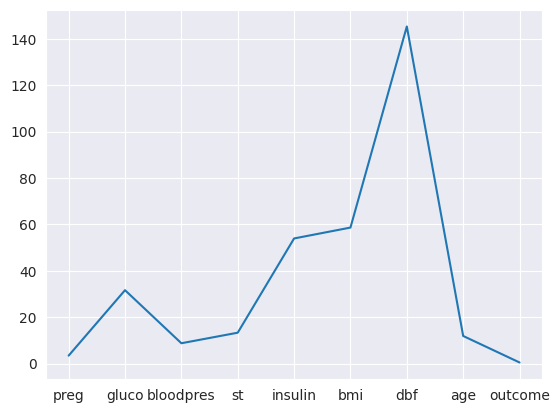

In [4]:
x_smote.std()

x_smote.std().plot()

<Axes: >

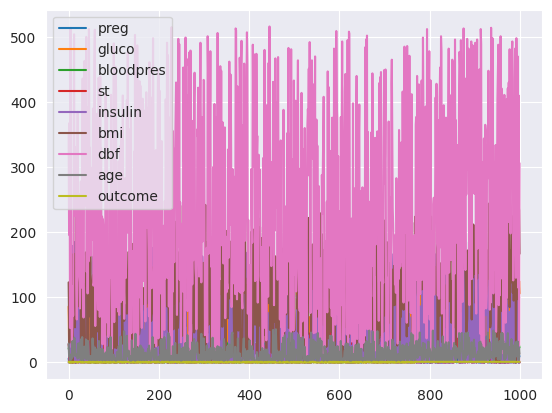

In [5]:
x_smote.plot()

In [6]:
# untuk menampilkan jumlah instance / record / rows tertentu
x_smote.head()

,preg,gluco,bloodpres,st,insulin,bmi,dbf,age,outcome
0,6.0,86.0,22.0,28.0,0.0,123.0,350.0,29.0,1.0
1,1.0,23.0,19.0,22.0,0.0,62.0,196.0,10.0,0.0
2,8.0,121.0,17.0,0.0,0.0,30.0,368.0,11.0,1.0
3,1.0,27.0,19.0,16.0,62.0,77.0,53.0,0.0,0.0
4,0.0,75.0,4.0,28.0,102.0,209.0,514.0,12.0,1.0


In [7]:
# untuk menampilkan fitur pregnan mulai posisi record ke 10
x_smote["preg"].iloc[10:20]

10     4.0
11    10.0
12    10.0
13     1.0
14     5.0
15     7.0
16     0.0
17     7.0
18     1.0
19     1.0
Name: preg, dtype: float64

<Axes: >

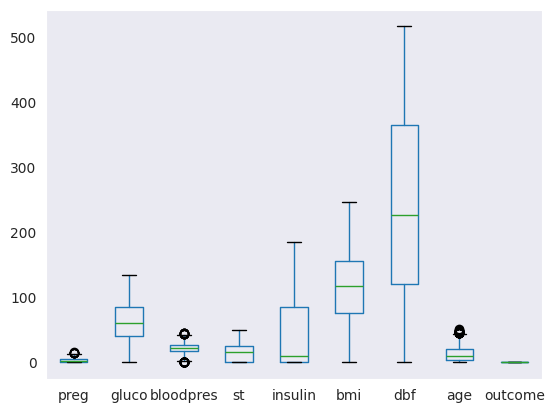

In [8]:
x_smote.boxplot(grid=False)

In [9]:
x_smote.size

9000

In [10]:
# untuk ukuran dimensi tabel
x_smote.shape

(1000, 9)

In [11]:
# untuk mengetahui tipe nilai data dari tabel
x_smote.dtypes

preg         float64
gluco        float64
bloodpres    float64
st           float64
insulin      float64
bmi          float64
dbf          float64
age          float64
outcome      float64
dtype: object

In [12]:
# untuk mengetahui korelasi antar fitur/variable
x_smote.corr()

,preg,gluco,bloodpres,st,insulin,bmi,dbf,age,outcome
preg,1.000000,0.113105,0.182390,-0.064035,-0.075724,0.014584,-0.010212,0.511897,0.215818
gluco,0.113105,1.000000,0.188315,0.052236,0.297276,0.227803,0.118975,0.279452,0.495279
bloodpres,0.182390,0.188315,1.000000,0.136829,0.037137,0.234910,0.023394,0.336282,0.106884
st,-0.064035,0.052236,0.136829,1.000000,0.492560,0.437739,0.205798,-0.123720,0.091452
insulin,-0.075724,0.297276,0.037137,0.492560,1.000000,0.187219,0.217564,-0.062907,0.130280
bmi,0.014584,0.227803,0.234910,0.437739,0.187219,1.000000,0.154249,0.019869,0.321225
dbf,-0.010212,0.118975,0.023394,0.205798,0.217564,0.154249,1.000000,0.033476,0.203381
age,0.511897,0.279452,0.336282,-0.123720,-0.062907,0.019869,0.033476,1.000000,0.257712
outcome,0.215818,0.495279,0.106884,0.091452,0.130280,0.321225,0.203381,0.257712,1.000000


In [13]:
# untuk menampilkan record terakhir 10
x_smote.tail(10)

,preg,gluco,bloodpres,st,insulin,bmi,dbf,age,outcome
990,13.0,67.0,0.0,23.0,0.0,186.0,322.0,23.0,1.0
991,10.0,53.0,0.0,0.0,0.0,0.0,130.0,9.0,1.0
992,1.0,66.0,38.0,34.0,30.0,109.0,498.0,12.0,1.0
993,9.0,83.0,32.0,27.0,99.0,97.0,414.0,32.0,1.0
994,1.0,53.0,21.0,23.0,64.0,133.0,302.0,11.0,1.0
995,5.0,124.0,25.0,20.0,123.0,214.0,470.0,32.0,1.0
996,6.0,53.0,14.0,32.0,0.0,124.0,115.0,19.0,1.0
997,0.0,100.0,25.0,47.0,66.0,243.0,410.0,4.0,1.0
998,8.0,125.0,26.0,0.0,0.0,234.0,26.0,22.0,1.0
999,10.0,106.0,23.0,0.0,0.0,167.0,306.0,13.0,1.0


In [14]:
# left, right = left.align(right, axis=1, copy=False)
# x_smote == pd.Series([100, 250], index=["preg", "age"])

In [15]:
x_smote.skew()

preg         0.818783
gluco        0.336250
bloodpres   -0.379867
st           0.226947
insulin      0.857681
bmi          0.102277
dbf          0.202871
age          1.000290
outcome      0.000000
dtype: float64

<Axes: >

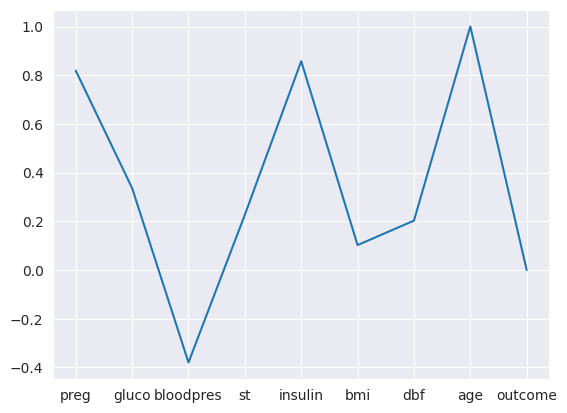

In [16]:
x_smote.skew().plot()

In [17]:
x_smote.value_counts()

preg  gluco  bloodpres  st    insulin  bmi    dbf    age   outcome
6.0   127.0  34.0       0.0   0.0      142.0  142.0  45.0  1.0        6
3.0   112.0  13.0       15.0  118.0    118.0  334.0  15.0  1.0        4
8.0   63.0   37.0       0.0   0.0      0.0    103.0  33.0  1.0        4
5.0   104.0  22.0       12.0  105.0    54.0   331.0  30.0  1.0        4
7.0   67.0   20.0       42.0  78.0     172.0  253.0  22.0  1.0        4
                                                                     ..
2.0   32.0   25.0       11.0  37.0     107.0  359.0  2.0   0.0        1
      33.0   10.0       7.0   57.0     57.0   408.0  1.0   0.0        1
      34.0   20.0       6.0   21.0     14.0   358.0  5.0   0.0        1
      36.0   14.0       10.0  76.0     134.0  77.0   1.0   0.0        1
16.0  101.0  22.0       34.0  72.0     194.0  425.0  26.0  1.0        1
Name: count, Length: 768, dtype: int64

/home/irlfdyh/Documents/UNIVERSITY/STUDY/S7/TUGAS-PROYEK-DATA-MINING/playground/venv/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='preg', ylabel='gluco'>

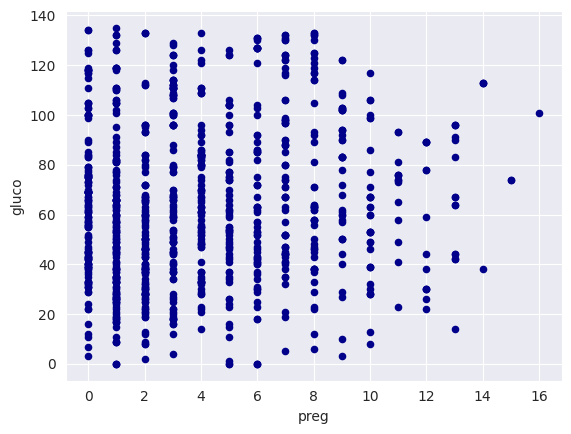

In [18]:
x_smote.plot.scatter(
    x = "preg",
    y = "gluco",
    c = "DarkBlue",
    colormap = "viridis"
)

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'gluco'}>,
        <Axes: title={'center': 'bloodpres'}>],
       [<Axes: title={'center': 'st'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'dbf'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'outcome'}>]], dtype=object)

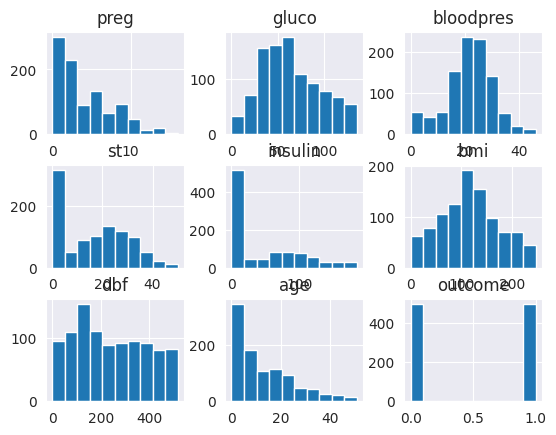

In [19]:
x_smote.hist()

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'bmi'}>]], dtype=object)

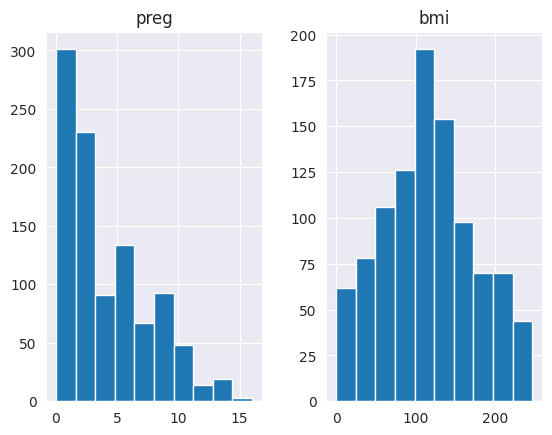

In [20]:
x_smote.hist(column = ["preg", "bmi"])

In [21]:
x_smote.index

RangeIndex(start=0, stop=1000, step=1)

/home/irlfdyh/Documents/UNIVERSITY/STUDY/S7/TUGAS-PROYEK-DATA-MINING/playground/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


(400,)
  Classifier                                         prediction  accuracy
0         NB                                    MultinomialNB()    0.6925
1       K-NN                KNeighborsClassifier(n_neighbors=3)    0.7150
2         RF  (DecisionTreeClassifier(max_depth=3, max_featu...    1.0000
3         DT                           DecisionTreeClassifier()    1.0000
4        MLP                        MLPClassifier(max_iter=100)    0.8000
5        SVM  SVC(decision_function_shape='ovo', kernel='lin...    1.0000


/tmp/ipykernel_80422/340189073.py:60: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Classifier', y='accuracy', data=cv_df,


<Axes: xlabel='Classifier', ylabel='accuracy'>

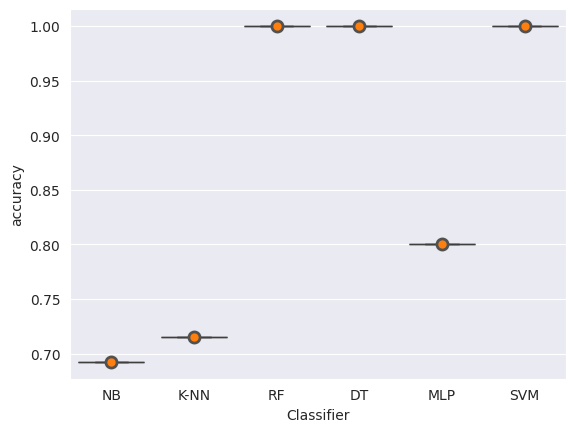

In [22]:
import pandas as pd    
import numpy as np
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.4, random_state = 1)

NaiveBayes = MultinomialNB().fit(x_train, np.ravel(y_train, order='C'))
Knn       = KNeighborsClassifier(n_neighbors = 3).fit(x_train, np.ravel(y_train, order='C'))
RandomForest = RandomForestClassifier(n_estimators=50, max_depth=3).fit(x_train, np.ravel(y_train, order='C'))
DTree =    DecisionTreeClassifier().fit(x_train, np.ravel(y_train, order='C'))
MultiLP =   MLPClassifier(max_iter= 100).fit(x_train, np.ravel(y_train, order='C'))
SuppVM =  SVC(gamma='scale', decision_function_shape='ovo', kernel = 'linear').fit(x_train, np.ravel(y_train, order='C'))

models = [
    NaiveBayes,
    Knn,      
    RandomForest, 
    DTree, 
    MultiLP, 
    SuppVM, 
] 
dlist = [
    'NB',
    'K-NN',      
    'RF', 
    'DT', 
    'MLP', 
    'SVM', 
]

i = 0
print(y_test.shape)
entries = []
for model in models:
  prediction = model.predict(x_test)
  accuracies = accuracy_score(y_test, prediction)
  nameS = dlist[i]
  entries.append((nameS, model, accuracies))
  i = i + 1

cv_df = pd.DataFrame(entries, columns=['Classifier','prediction','accuracy'])
cv_df.to_csv('akurasi.csv')
print(cv_df)


sns.boxplot(x='Classifier', y='accuracy', data=cv_df)
sns.stripplot(x='Classifier', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print(x_test)

prediction = MultinomialNB().fit(x_train, y_train)

prediction_result = prediction.predict(x_test)

print(classification_report(y_test, prediction_result))
print(prediction_result)

(600, 9)
(400, 9)
(600,)
(400,)
     preg  gluco  bloodpres    st  insulin    bmi    dbf   age  outcome
507   1.0   68.0       14.0  16.0    103.0   82.0  377.0   0.0      0.0
818   8.0   63.0       37.0   0.0      0.0    0.0  103.0  33.0      1.0
452   0.0   29.0       20.0  25.0    124.0  186.0  214.0   4.0      0.0
368   3.0   19.0       31.0   9.0     37.0   71.0  165.0   1.0      0.0
242   3.0   77.0       10.0   0.0      0.0   53.0  229.0   1.0      1.0
..    ...    ...        ...   ...      ...    ...    ...   ...      ...
172   2.0   25.0        0.0  16.0      0.0   85.0  415.0   4.0      0.0
554   1.0   22.0       17.0  16.0     73.0  156.0  271.0   7.0      0.0
103   1.0   19.0       22.0  11.0     13.0   62.0  146.0   3.0      0.0
754   8.0   92.0       26.0  25.0      0.0  113.0  255.0  24.0      1.0
673   3.0   61.0       39.0  28.0    133.0  245.0  444.0   1.0      0.0

[400 rows x 9 columns]
              precision    recall  f1-score   support

         0.0       0.73  